# Examples for Documentation Website

This notebook is for internal usage, and intended purely to help generate the images used in the documentation website.

In [14]:
import valency_anndata as val
from anndata import AnnData
import numpy as np

# 1. Define dimensions (cells x genes)
n_obs = 100
n_vars = 25

# 2. Create fake count data (dense numpy array)
X = np.random.poisson(1, size=(n_obs, n_vars)).astype(np.float32)

adata_empty = AnnData(X)

adata_mock = adata_empty.copy()
adata_mock.obs["user_annotation"] = None
adata_mock.obs["one_more"] = None
adata_mock.var["statement_annotation"] = None
adata_mock.var["another_one"] = None

adata_polis_new = val.datasets.polis.load("https://pol.is/report/r2dfw8eambusb8buvecjt")

Data was gathered using the Polis software (see: https://compdemocracy.org/polis
and https://github.com/compdemocracy/polis) and is sub-licensed under CC BY 4.0
with Attribution to The Computational Democracy Project.
The data and more information about how the data was collected can be found at
the following link: https://pol.is/report/r2dfw8eambusb8buvecjt


### val.viz.schematic_diagram

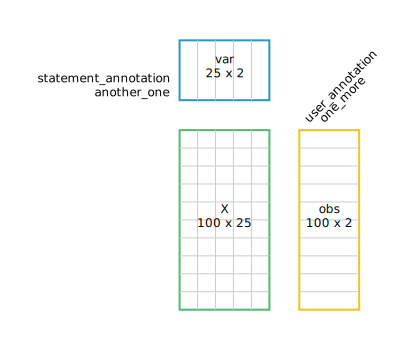

In [21]:
adata = adata_mock.copy()

val.viz.schematic_diagram(adata, filename="viz--schematic-diagrams-diff-simple.svg")

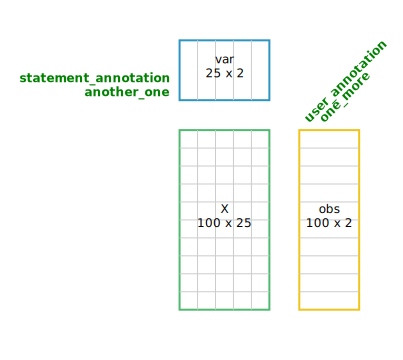

In [20]:
adata = adata_mock.copy()

val.viz.schematic_diagram(adata, diff_from=None, filename="viz--schematic-diagrams-diff-new.svg")

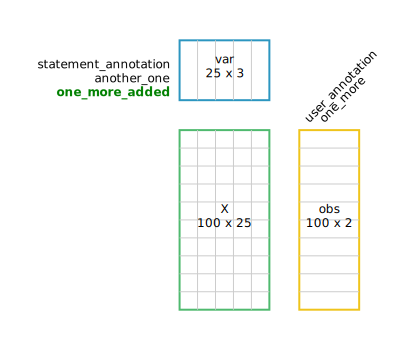

In [17]:
adata = adata_mock.copy()

adata_snap = adata.copy()
adata.var["one_more_added"] = None
val.viz.schematic_diagram(adata, diff_from=adata_snap, filename="viz--schematic-diagrams-diff-from.svg")

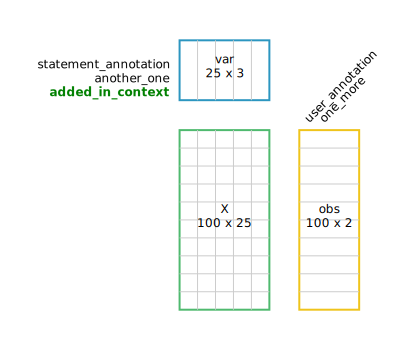

In [19]:
adata = adata_mock.copy()

with val.viz.schematic_diagram(diff_from=adata, filename="viz--schematic-diagrams-diff-context.svg"):
    adata.var["added_in_context"] = None